## Processing data

In [1]:
import pandas as pd
cafe_reviews = pd.read_parquet("cafe_reviews.parquet")

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.casual import TweetTokenizer
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize, WhitespaceTokenizer, RegexpTokenizer
from nltk.corpus import words
from nltk.tokenize import SyllableTokenizer

# download package
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('words')

# upload stopwords and string
punctuations = set(string.punctuation)
english_words = set(words.words())

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package words to /home/jupyter/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
cafe_reviews['text']

11         Locals recommended Milktooth, and it's an amaz...
19         My absolute favorite cafe in the city. Their b...
43         Stopped by after a Sunday morning walk in the ...
127        Milktooth is the place to go if you want a goo...
243        So much to like about this place--the beautifu...
                                 ...                        
6989334    The Black Cat Cafe is a nice little restaurant...
6989383    Cherry Espresso Bar is located inside a buildi...
6989397    Since I'm now working from home, I'm trying to...
6989508    I am surprised by the recent negative reviews....
6989525    Fiddlehead Fern Cafe keeps getting better and ...
Name: text, Length: 111685, dtype: object

In [4]:
cr_text = pd.DataFrame(cafe_reviews.text.str.lower())
cr_text

,text
11,"locals recommended milktooth, and it's an amaz..."
19,my absolute favorite cafe in the city. their b...
43,stopped by after a sunday morning walk in the ...
127,milktooth is the place to go if you want a goo...
243,so much to like about this place--the beautifu...
...,...
6989334,the black cat cafe is a nice little restaurant...
6989383,cherry espresso bar is located inside a buildi...
6989397,"since i'm now working from home, i'm trying to..."
6989508,i am surprised by the recent negative reviews....


## Clean the text

### tokenize

In [5]:
casual_tknzr = TweetTokenizer(reduce_len=True)
cafe_tokenized = [casual_tknzr.tokenize(t) for t in cr_text['text']] 
cafe_tokenized[0]

['locals',
 'recommended',
 'milktooth',
 ',',
 'and',
 "it's",
 'an',
 'amazing',
 'jewel',
 'of',
 'indianapolis',
 '.',
 "i'm",
 'glade',
 'i',
 'had',
 'the',
 'chance',
 'to',
 'experience',
 'this',
 '.']

### stop word & punctuation

In [6]:
english_words = set(words.words())
stop_words = set(stopwords.words('english'))
#punctuations = set(string.punctuation) Interested in removing these to see if it helps. if not, paste -> into list comprehension. ||| and word not in punctuations
cafe_txt_filtered = [[word for word in sentence if word.lower() not in stop_words and word.lower() in english_words] for sentence in cafe_tokenized]
cafe_txt_trunc = [sentence[:30] for sentence in cafe_txt_filtered]  # shortening reviews to 30 tokens. Hopes to fix computation
print(cafe_txt_trunc[1])

['absolute', 'favorite', 'city', 'black', 'white', 'probably', 'best', 'ever', 'sweet', 'right', 'amount', 'foam', 'always', 'really', 'good', 'even', 'people', 'lot', 'space', 'work', 'noise', 'level', 'perfect', 'music', 'perfect', 'level', 'always', 'enjoy', 'bring', 'dogs']


In [7]:
cr_text["clean_text"] = [" ".join(sentence) for sentence in cafe_txt_trunc]
cv = CountVectorizer()
t = cv.fit_transform(cr_text["clean_text"])

In [8]:
freq_array = t.sum(axis=0).A1
cafe_token_freq = pd.DataFrame({"token": cv.get_feature_names_out(), 'freq_count': freq_array})

In [9]:
cafe_token_freq.sort_values(by='freq_count', ascending=False)

,token,freq_count
2630,coffee,56345
10460,place,48129
6282,great,39914
5614,food,37324
6165,good,35694
...,...,...
12078,ruff,1
2135,caterpillar,1
6287,greediness,1
6290,greener,1


## Vectorize

In [10]:
import scipy.sparse
from sklearn.feature_extraction.text import TfidfVectorizer

# Save TF-IDF as a sparse matrix (NO `.toarray()`)
tfidf_model = TfidfVectorizer()
df_tfidf_transformed = tfidf_model.fit_transform(cr_text["clean_text"])

In [11]:
tfidf_vectors = pd.DataFrame.sparse.from_spmatrix(df_tfidf_transformed, columns=tfidf_model.get_feature_names_out())

tfidf_vectors

,aa,aback,abandon,abandoned,abatement,abbey,abdomen,aberration,abhor,abhorrent,...,zippy,zodiac,zombie,zone,zoned,zoning,zoo,zoom,zowie,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With this, we can begin topic modeling.

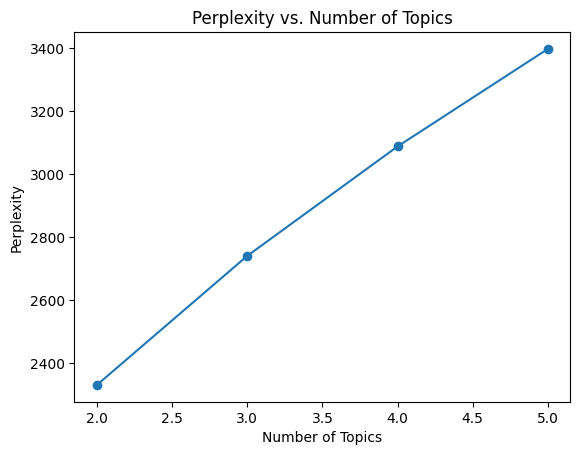

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation

perplexities = [] #lower perplexity = better
topic_range = range(2,6)

for num_topics in topic_range:
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(df_tfidf_transformed)
    perplexities.append(lda.perplexity(df_tfidf_transformed))

import matplotlib.pyplot as plt

plt.plot(topic_range, perplexities, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")
plt.title("Perplexity vs. Number of Topics")
plt.show()